<a href="https://colab.research.google.com/github/KVinayReddy7/21BDS0287-EDA/blob/main/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPLORATORY DATA ANALYSIS THEORY
#DIGITAL ASSIGNMENT

KATUKURI VINAY REDDY

21BDS0287

#MODULE-2(Data Transformation)


Importing and Reading the .csv file

In [ ]:
import pandas as pd

# Loading the dataset from the new GitHub link
url = 'https://github.com/KVinayReddy7/21BDS0287-EDA/blob/main/credit%20card.csv?raw=true'
data = pd.read_csv(url)

data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Data Deduplication

In [ ]:
# Check for duplicate rows
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates if present
data = data.drop_duplicates()
print(f"Dataset shape after removing duplicates: {data.shape}")

Number of duplicate rows: 0
Dataset shape after removing duplicates: (5000, 14)


Handling Missing Data

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handling missing values in 'Experience' column with the mean
data['Experience'].fillna(data['Experience'].mean(), inplace=True)

# Verify that there are no more missing values
print("Missing values after handling:")
print(data.isnull().sum())

Missing values in each column:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
Missing values after handling:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


<ipython-input-11-62126d3a9187>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Experience'].fillna(data['Experience'].mean(), inplace=True)


Handling Missing Data with Maximum Likelihood Estimation (MLE)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a copy of the dataset
data_mle = data.copy()

# Introduce missing values in 'Income' for demonstration
data_mle.loc[0:5, 'Income'] = np.nan

# Separate the data into training (without missing values) and prediction (with missing values)
train_data = data_mle.dropna(subset=['Income'])
predict_data = data_mle[data_mle['Income'].isnull()]

# Define features (X) and target (y)
X_train = train_data[['Age', 'Experience', 'CCAvg']]
y_train = train_data['Income']
X_predict = predict_data[['Age', 'Experience', 'CCAvg']]

# Train the linear regression model
mle_model = LinearRegression()
mle_model.fit(X_train, y_train)

# Predict missing 'Income' values
predicted_values = mle_model.predict(X_predict)
data_mle.loc[data_mle['Income'].isnull(), 'Income'] = predicted_values

# Display the updated dataset with estimated 'Income' values
print(data_mle.head())

   ID  Age  Experience     Income  ZIP Code  Family  CCAvg  Education  \
0   1   25           1  72.758558     91107       4    1.6          1   
1   2   45          19  64.440358     90089       3    1.5          1   
2   3   39          15  61.535484     94720       1    1.0          1   
3   4   35           9  85.532159     94112       1    2.7          2   
4   5   35           8  54.158819     91330       4    1.0          2   

   Mortgage Personal Loan Securities Account CD Account  Online CreditCard  
0         0             0                  1          0       0          0  
1         0             0                  1          0       0          0  
2         0             0                  0          0       0          0  
3         0             0                  0          0       0          0  
4         0             0                  0          0       0          1  


Data Discretization

In [ ]:
# Define bins for discretizing 'age' column
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '21-40', '41-60', '61-80']
data['Age_binned'] = pd.cut(data['Age'], bins=bins, labels=labels)

data[['Age', 'Age_binned']].head()

,Age,Age_binned
0,25,21-40
1,45,41-60
2,39,21-40
3,35,21-40
4,35,21-40


Visualizing Binned Data

<ipython-input-20-10a7119e7a2d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_binned_counts.index, y=age_binned_counts.values, palette='viridis')


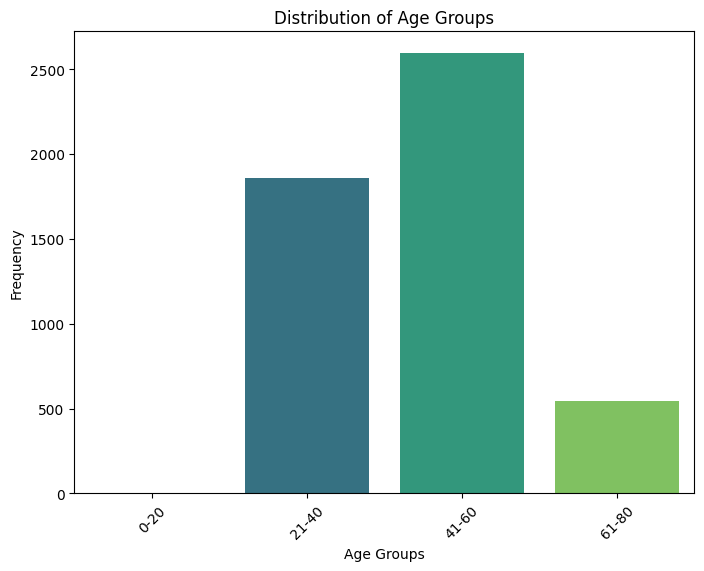

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences in each bin
age_binned_counts = data['Age_binned'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=age_binned_counts.index, y=age_binned_counts.values, palette='viridis')

plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

Outlier Detection

In [ ]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = data[(data['Income'] < lower_bound) | (data['Income'] > upper_bound)]
print(f"Number of outliers detected in 'Income': {len(outliers)}")
print(f"Dataset shape after outlier handling: {data.shape}")

Number of outliers detected in 'Income': 96
Dataset shape after outlier handling: (5000, 16)
